# Model Selection and Evaluation - Part 1

When building supervised machine learning models, we need to solve two
problems:

1. **Model selection** - Finding the model that does as well as possible
on our learning task.

2. **Model evaluation** - Predicting **generalization error**, or the expected performance of our
model on unseen data.

Both are critical.  Without 1. we can't have an effective model and
without 2. we can't *know* if we have an effective model.

## Parameters and Hyperparameters

Building a machine learning model involves both **parameters** and **hyperparameters**:

* The **parameters** of a model are learned directly from the training data. For example, in the case of fitting a polynomial, the parameters are the "learned" polynomial coefficients of the best fit.
* **Hyperparameters** are parameters of our learning models that need to be selected before the model can be learned.  In the example of fitting a polynomial, the key hyperparameter is the degree of the polynomial.  

Once we have picked a particular machine learning algorithm, model
selection comes down to the problem of **hyperparameter** tuning.

**WARNING:**  In the exercises below will showcase several *BAD* approaches to model selection and evaluation.  These examples are not meant to illustrate the correct way of doing things, they are meant to show the consequences of doing things incorrectly. 

**ENTER YOUR NAMES IN THE CELL BELOW**

SAYEMUM HASSAN


----
## Questions:
* Describe the *parameters* of the decision tree learning algorithm.
* Describe some *hyperparameters* of the decision tree learning algorithm. 


Parameters - node splits, leaf nodes ---------
Hyperparameters - max_leaf_nodes

## Exercise 1 - Naive Model Selection

For now, let's focus entirely on model selection and disregard model
evaluation.  The following cell will load a data set and use a
decision tree regressor to fit a decision tree to the data. Try adjusting the `max_leaf_nodes` hyperparameter in order to minimize the MSE on the training set.

MSE: 0.0000


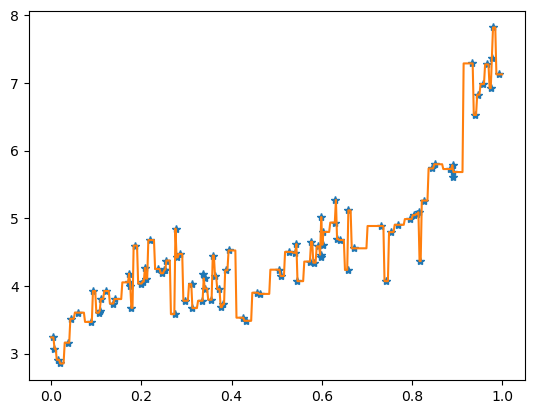

In [11]:
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import sprinkle_data

from sklearn.tree import DecisionTreeRegressor

# Grab our training data
source = sprinkle_data.SprinkleDataSource()
X, y = source.gen_data(num=100, seed=100)

# Build a decision tree regressor
tree = DecisionTreeRegressor(max_leaf_nodes=100) # ADJUST THIS VALUE!
tree.fit(X, y)

# Evaluate the MSE of our decision tree on the training set
y_predict = tree.predict(X)
mse = np.sum((y - y_predict)**2) / y.size
print("MSE: {:.4f}".format(mse))

# Plot the fit.
plt.plot(X, y, '*')
x_plt = np.linspace(0, 1, 400).reshape(400, 1)
plt.plot(x_plt, tree.predict(x_plt))
plt.show()


Best max_leaf_nodes: 100
Minimum MSE: 0.0000


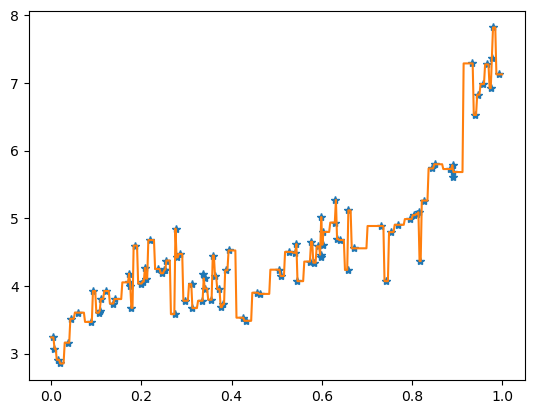

In [16]:
# Write some code to find the best number of leaves..
# You could write a loop here to loop over possible values for
# max_leaf_nodes, and use matplotlib to plot the corresponding 
# MSE values. Note that the minimum value for max_leaf_nodes is 2.

# YOUR CODE HERE
# raise NotImplementedError()
max_leaf_values = range(2, 101)
mse_values = []

for i in max_leaf_values:
    tree = DecisionTreeRegressor(max_leaf_nodes=i)
    tree.fit(X, y)

    # Evaluate the MSE of our decision tree on the training set
    y_predict = tree.predict(X)
    mse = np.sum((y - y_predict)**2) / y.size
    mse_values.append(mse)

    
# Find the best max_leaf_nodes value
best_max_leaf_nodes = max_leaf_values[np.argmin(mse_values)]
print("Best max_leaf_nodes: {}".format(best_max_leaf_nodes))
print("Minimum MSE: {:.4f}".format(min(mse_values)))

# Fit the decision tree regressor with the best max_leaf_nodes value
tree = DecisionTreeRegressor(max_leaf_nodes=best_max_leaf_nodes)
tree.fit(X, y)

# Plot the fit.
plt.plot(X, y, '*')
x_plt = np.linspace(0, 1, 400).reshape(400, 1)
plt.plot(x_plt, tree.predict(x_plt))
plt.show()

### Questions

* What value of the hyperparameter resulted in the lowest MSE?
* Do you think that this MSE reflects how well this model will do on unseen data?  Why or why not?

The best is 100.
It may not entirely since at some point, the MSE becomes 0 to the point where the model is free of errors. When I feel like there's more to it. MSE is a good measure until it reaches a certain point after discovering how many max_leaf_nodes completely minimizes it.

In the exercise above, you were able to tune the hyperparameters so as to *perfectly* fit the training data.  Now let's see what happens when we use this model on some new data drawn from the same underlying distribution:

In [17]:
tree = DecisionTreeRegressor(max_leaf_nodes=100) # Fill in the optimal answer you found above.
tree.fit(X, y)

# Generate some new data from the same distribution:
X_new, y_new = source.gen_data(100000, seed=200)

# Evaluate our model on the new data:
y_new_predict = tree.predict(X_new)
mse = np.sum((y_new - y_new_predict)**2) / y_new.size
print("MSE: {:.4f}".format(mse))

MSE: 0.1664


## Exercise 2 - Using a Test Set for Hyperparameter Tuning and Evaluation

In the exercise above, you were able to perfectly fit a training data set, but that didn't tell you anything about how well your model would perform on unseen data. Recall that we want our models to **generalize**, that is, perform well on data that the model has not seen
previously.

We might address this by splitting our limited data into a **training set** and a **test set**.  The training set is used to fit the parameters, and the test set is used as a proxy for unseen data. This is illustrated in the cell below.

In [18]:
# Split our data into a training and testing set...
split_point = int(X.shape[0] * .8) # Use 80% of the data to train the model

X_train = X[:split_point, :]
y_train = y[:split_point]

X_test = X[split_point:, :]
y_test = y[split_point:]

# Build a decision tree regressor using the TRAINING set
tree = DecisionTreeRegressor(max_leaf_nodes=3)
tree.fit(X_train, y_train)

# Evaluate the MSE of our decision tree on the TESTING set 
y_test_predict = tree.predict(X_test)
mse = np.sum((y_test - y_test_predict)**2) / y_test.size
print("MSE: {:.4f}".format(mse))

MSE: 0.0966


In the code block below, write a loop that iterates over the hyperparameter for the number of leaves and reports the value that produces the lowest error rate on the test data. 

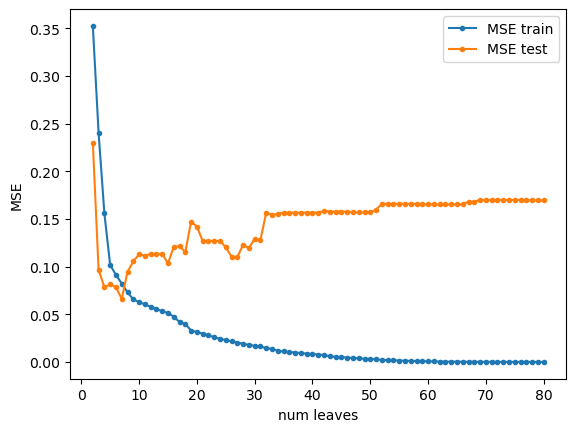

In [21]:
def explore_num_leaves(X_train, y_train, X_test, y_test, max_max_leaves):
    """ Systematically evaluate different settings for max_leaf_nodes by
    building a decision tree at each possible size and evaluating MSE
    on both the training set the test set.
    
    (Note that the minimum value for the max_leaf_nodes argument to 
    DecisionTreeRegressor is 2.)
    
    Returns:
       train_mse - Numpy array of length max_max_leaves - 1. Entry zero 
                   corresponds MSE for a tree with two leaves, entry one corresponds 
                   to three leaves etc.
       test_mse -  Same structure, but containing MSE on the test set. 
    
    """
    train_mse = np.zeros((max_max_leaves-1,))
    test_mse = np.zeros((max_max_leaves-1,))
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(2, max_max_leaves + 1):
        tree = DecisionTreeRegressor(max_leaf_nodes=i)
        tree.fit(X_train, y_train)

        # Evaluate the MSE of our decision tree on the training set
        y_train_predict = tree.predict(X_train)
        train_mse[i-2] = np.mean((y_train - y_train_predict)**2)

        # Evaluate the MSE of our decision tree on the testing set
        y_test_predict = tree.predict(X_test)
        test_mse[i-2] = np.mean((y_test - y_test_predict)**2)

    return train_mse, test_mse

# Run the experiment
max_max_leaves = 80
train_mse, test_mse = explore_num_leaves(X_train, y_train, X_test, y_test, max_max_leaves)

# Plot the result
num_leaves = np.arange(2, max_max_leaves + 1)
plt.plot(num_leaves, train_mse, '.-', label='MSE train')
plt.plot(num_leaves, test_mse, '.-', label='MSE test')
plt.xlabel('num leaves')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [22]:
#TEST ON FIRST AND LAST VALUES
np.testing.assert_almost_equal(train_mse[0], 0.35245863397873406)
np.testing.assert_almost_equal(test_mse[0], 0.2300883386121208)
np.testing.assert_almost_equal(train_mse[-1], 0)
np.testing.assert_almost_equal(test_mse[-1], 0.16938288794527132)

### Questions
* What hyperparameter settings gives us the lowest MSE on the testing data?  What is the MSE? 
* Do you think *this* MSE will be reflective of how well our model will perform on unseen data? Why or why not?

The number of max leaves being around 6-8. The MSE is around 0.6-0.7
This gives us a more accurate reflection because training data can iteratively mitigate as much MSE as possible until we're satisfied. But the same can't be said about testing data since we're less predictive on how well it will do.

## Checking Performance on Unseen Data

Notice that in this example we are using our test set for *both* model selection and model evaluation.  We used it for model selection by searching for a hyperparameter setting that minimizes error on the test set.  We use it for model evaluation by using our test set error as an estimate of the expected error rate on unobserved data.

Let's see how our model does on some new, unobserved data drawn from the same distribution.  This cell will give us a good estimate of our *actual* generalization error.  (Note that in real-world problems we can't run a test like this because we don't have unlimited access to extra data that we can use to check our work.)

In [35]:
tree = DecisionTreeRegressor(max_leaf_nodes=11) # Put your best hyperparameter here!
tree.fit(X_train, y_train)

# Let's see how we do on unobserved data... 
X_new, y_new = source.gen_data(100000, seed=200)
y_new_predict = tree.predict(X_new)
mse = np.sum((y_new - y_new_predict)**2) / y_new.size
print("MSE: {:.4f}".format(mse))

MSE: 0.1190


### Questions

* Relative to Exercise 1, where we just looked for the model that best fit our training data, would you say that our train/test split was beneficial in terms of *model selection*, i.e. did the test set help us to find a model with lower prediction error on unseen data? Justify your answer.
* Would you say that our train/test split was beneficial in terms of *model evaluation*, i.e. was the error rate on the test set a good predictor of the error rate on unseen data?  Did we overestimate the error rate or underestimate it?

Our train/test split was benificial for model selection because splitting the data into training and testing helped find a model with a lower MSE on unseen data by preventing overfitting.
Our train/test split was also beneficial since it provides us a good estimate of the performance on unseen data. It can always improve so that it's unbiased and works for our observations.

### Click [here](model_selection_2.ipynb) to open the next page of exercises...